# Intro / preparing data

Different datasets based on CIFAR 10 will be tested on a basic model using data augmentation. 
We will add layers of data augmentation one by one and see the evolution.

Visualization of metrics is possible at the end of this notebook using TensorBoard

If you already ran the notebook : you can directly skip to the Data viz part

If needed, you can find CIFAR 10 images at :

In [1]:
%load_ext tensorboard

In [2]:
###### Local imports
from src.model_utilities import train_model, create_model, retrieve_data, prediction

###### Various imports
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np

###### Tensorflow imports
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

###### Sklearn imports
from sklearn.model_selection import train_test_split


###### Setting global variables
TRAIN_BASE_DIRECTORY = "./data/train"
VAL_BASE_DIRECTORY = "./data/test"
IMAGE_SIZE = 32
BATCH_SIZE = 64

# Initializing model

We set up a basic model architecture which will be used for all trainings

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

#Fin obligatoire
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 64)        2112      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4

# First dataset : vanilla

We read the CIFAR 10 dataset and train the model as is

In [4]:
####### Setting the data generator
datagen = ImageDataGenerator(validation_split=0.2)

In [5]:
####### Retrieving data using the ImageDataGenerator
train_generator ,val_generator = retrieve_data(datagen,
                                               TRAIN_BASE_DIRECTORY,
                                               BATCH_SIZE)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [6]:
train_model(model, train_generator, val_generator, name="Base_Model", n_epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
  1/625 [..............................] - ETA: 0s - loss: 25.5683 - accuracy: 0.1094WARNING:tensorflow:From C:\Users\drakk\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
625/625 [==============================] - 745s 1s/step - loss: 2.2140 - accuracy: 0.3618 - val_loss: 1.4885 - val_accuracy: 0.4752
Epoch 2/20
625/625 [==============================] - 34s 55ms/step - loss: 1.4121 - accuracy: 0.4997 - val_loss: 1.3235 - val_accuracy: 0.5263
Epoch 3/20
625/625 [==============================] - 35s 56ms/step - loss: 1.2793 - accuracy: 0.5535 - val_loss: 1.2742 - val_accuracy: 0.5482
Epoch 4/20
625/625 [==============================] - 36s 57ms/step - loss: 1.1947 - accuracy: 0.5811 - val_loss: 

# Adding random rotation on image

We add a random tilt between 0 and 20 degrees

In [7]:
####### Setting the data generator
datagen20 = ImageDataGenerator(validation_split=0.2,
                               rotation_range=20)

In [8]:
####### Retrieving data using the ImageDataGenerator
train_generator20 ,val_generator20 = retrieve_data(datagen20,
                                               TRAIN_BASE_DIRECTORY,
                                               BATCH_SIZE)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [9]:
model20 = create_model()

train_model(model20, train_generator20, val_generator20, name="20percent_Rotation_Model", n_epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 16, 16, 64)        2112      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# Adding random horizontal flip

Keeping the 20 degrees tilt we add a random horizontal flip

In [10]:
####### Setting the data generator
datagen20hflip = ImageDataGenerator(validation_split=0.2,
                                    rotation_range=20,
                                    horizontal_flip=True)

In [11]:
####### Retrieving data using the ImageDataGenerator
train_generator20hflip ,val_generator20hflip = retrieve_data(datagen20hflip,
                                               TRAIN_BASE_DIRECTORY,
                                               BATCH_SIZE)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [12]:
model20hflip = create_model()

train_model(model20hflip, train_generator20hflip, val_generator20hflip, name="20percent_Rotation+Horizontal_Flip_Model", n_epochs=20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 16, 16, 64)        2112      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

# Adding random vertical flip and brightness range

Even if the previous model isn't overfitting anymore, we'll try a last data augmentation ton see if we can get a better result

In [13]:
####### Setting the data generator
datagen20bothflips = ImageDataGenerator(validation_split=0.2,
                                    rotation_range=20,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    brightness_range=(0.2, 0.8))

In [14]:
####### Retrieving data using the ImageDataGenerator
train_generator20bothflips ,val_generator20bothflips = retrieve_data(datagen20bothflips,
                                               TRAIN_BASE_DIRECTORY,
                                               BATCH_SIZE)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [15]:
model20bothflips = create_model()

train_model(model20bothflips, train_generator20bothflips, val_generator20bothflips, name="20percent_Rotation+Horizontal_Vertical_Flip_Brightness_Model", n_epochs=20)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_6 (Dense)              (None, 16, 16, 64)        2112      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

# Data viz

Check and uncheck models to make graphs more readable

In [17]:
%tensorboard --logdir logs --host=localhost --port=8005

Reusing TensorBoard on port 8005 (pid 512), started 0:09:18 ago. (Use '!kill 512' to kill it.)

## Reloading models (optional if you just ran the notebook)

In [3]:
model = load_model("./models/Base_Model")
plus_tilt = load_model("./models/20percent_Rotation_Model")
plus_hflip = load_model("./models/20percent_Rotation+Horizontal_Flip_Model")
plus_vhflip_bright = load_model("./models/20percent_Rotation+Horizontal_Vertical_Flip_Brightness_Model")
tf.autograph.set_verbosity(0)

# Predicting on test images

Ground truth : truck
Prediction of base model : ship. probs=  93.21911334991455
Prediction of Augmented model #1 : deer. probs=  46.78786098957062
Prediction of Augmented model #2 : cat. probs=  26.77687108516693
Prediction of Augmented model #3 : truck. probs=  94.80327367782593


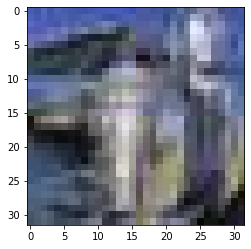

In [17]:
###### Retrieving labels
labels_array = os.listdir(VAL_BASE_DIRECTORY)

###### Image selection
choix = r"./data/test/truck/0007.jpg"

prediction(choix, VAL_BASE_DIRECTORY, model, plus_tilt, plus_hflip, plus_vhflip_bright)

Ground truth : automobile
Prediction of base model : automobile. probs=  99.9971866607666
Prediction of Augmented model #1 : automobile. probs=  98.50426912307739
Prediction of Augmented model #2 : automobile. probs=  98.00350666046143
Prediction of Augmented model #3 : automobile. probs=  53.45054268836975


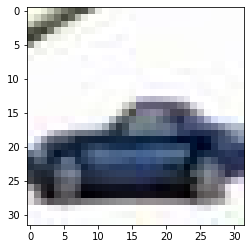

In [18]:
###### Image selection
choix = r"./data/test/automobile/0007.jpg"

prediction(choix, VAL_BASE_DIRECTORY, model, plus_tilt, plus_hflip, plus_vhflip_bright)

Ground truth : horse
Prediction of base model : bird. probs=  88.36610913276672
Prediction of Augmented model #1 : horse. probs=  99.17023777961731
Prediction of Augmented model #2 : horse. probs=  88.2375419139862
Prediction of Augmented model #3 : horse. probs=  53.2892644405365


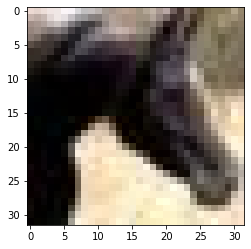

In [19]:
###### Image selection
choix = r"./data/test/horse/0017.jpg"

prediction(choix, VAL_BASE_DIRECTORY, model, plus_tilt, plus_hflip, plus_vhflip_bright)

Ground truth : bird
Prediction of base model : bird. probs=  70.22145390510559
Prediction of Augmented model #1 : bird. probs=  57.17986822128296
Prediction of Augmented model #2 : airplane. probs=  50.489342212677
Prediction of Augmented model #3 : bird. probs=  63.40059041976929


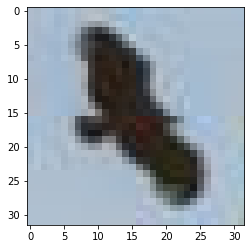

In [20]:
###### Image selection
choix = r"./data/test/bird/0017.jpg"

prediction(choix, VAL_BASE_DIRECTORY, model, plus_tilt, plus_hflip, plus_vhflip_bright)

Ground truth : airplane
Prediction of base model : airplane. probs=  83.99770259857178
Prediction of Augmented model #1 : airplane. probs=  92.7056610584259
Prediction of Augmented model #2 : airplane. probs=  93.35193037986755
Prediction of Augmented model #3 : airplane. probs=  69.56873536109924


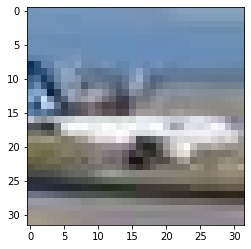

In [21]:
###### Image selection
choix = r"./data/test/airplane/0007.jpg"

prediction(choix, VAL_BASE_DIRECTORY, model, plus_tilt, plus_hflip, plus_vhflip_bright)

# Conclusion

As we went through the different phases of data augmentation, we noticed an improvement of the loss. At the start, we could clearly see that the model was overfitting.

Combining all the previously used data augmentation techniques resulted in a model where validation loss is almost the exact same as the training loss.

When testing we see that in some cases the model without data augmentation is better.
